In [21]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt


# Regressão Linear e Logística

- Introdução e aplicações
- Ordinary Least Squares
- Coeficientes, intervalo de confiança e p-valores

Vamos usar o dataset 'Titanic' e tentar precer a probabilidade de um passeigro com base em suas características (classe, sexo e idade)

O que a regressão logística assume:

- Variável Dependente Binária: O resultado a ser previsto tem duas categorias (ex. 0 ou 1).
- Linearidade em Logit: A relação entre log-odds da variável dependente e as variáveis independentes é linear.
- Sem Multicolinearidade: As variáveis independentes não são altamente correlacionadas entre si.
- Observações Independentes: Cada observação nos dados é independente das outras.
- Amostra Grande: É necessário um tamanho de amostra suficientemente grande.
- Modelo Adequado: O modelo inclui variáveis relevantes e exclui as irrelevantes, sem interações significativas não contempladas.

In [2]:
titanic = sns.load_dataset('titanic')
titanic.dropna(inplace=True)

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [4]:
# Separar variáveis dependentes e independentes
X = titanic[['pclass', 'sex', 'age']]
y = titanic['survived']

In [5]:
# Transformar a coluna 'sex' em numérica
X['sex'] = X['sex'].map({'male': 0, 'female': 1})


C:\Users\gabri\AppData\Local\Temp\ipykernel_21200\1705568923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})


1.  **X**, **y**: Dados de características e rótulos.
2.  **test_size**: Proporção/quantidade de dados para o conjunto de teste.
3.  **train_size**: Proporção/quantidade de dados para o conjunto de treinamento.
4.  **random_state**: Inteiro para reprodutibilidade da divisão.
5.  **shuffle**: Booleano, se True, embaralha os dados antes da divisão.
6.  **stratify**: Divide dados mantendo a proporção das classes, geralmente igual a **y**.

In [6]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Inicializar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calcular métricas
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Matriz de Confusão: \n", confusion_matrix(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred_proba))
print("Log Loss: ", log_loss(y_test, y_pred_proba))

Acurácia:  0.7297297297297297
Matriz de Confusão: 
 [[ 9  4]
 [ 6 18]]
Precisão:  0.8181818181818182
Recall:  0.75
F1-Score:  0.7826086956521738
AUC:  0.8397435897435898
Log Loss:  0.5274853934954742


1.  **Acurácia**:

-   Porcentagem de previsões corretas do modelo.

2.  **Matriz de Confusão**:

-   Tabela que mostra verdadeiros e falsos positivos/negativos.

3.  **Precisão**:

-   Porcentagem de verdadeiros positivos entre todas as previsões positivas. Útil quando os falsos positivos são caros.

4.  **Recall**:

-   Porcentagem de verdadeiros positivos entre todas as observações positivas reais. Útil quando os falsos negativos são caros.

5.  **F1-Score**:

-   Média harmônica de Precisão e Recall. Útil quando se busca um equilíbrio entre Precisão e Recall.

6.  **AUC (Area Under the Curve)**:

-   Resumo numérico da Curva ROC; quanto maior, melhor o modelo. Indica a capacidade do modelo de distinguir entre classes.

7.  **Log Loss (Perda Logarítmica)**:

-   Mede o desempenho de um modelo de classificação onde a saída prevista é uma probabilidade. Menor é melhor.

## Diferenças regressão logística e linear:

### Objetivo:

- Regressão Linear: Prevê um valor numérico contínuo.
- Regressão Logística: Prevê a probabilidade de uma observação pertencer a uma categoria.

### Variável Dependente:

- Regressão Linear: Contínua (quantitativa).
- Regressão Logística: Binária/Categórica.

### Função de Ligação:

- Regressão Linear: Identidade (a saída é uma combinação linear das entradas).
- Regressão Logística: Logit (a saída é uma função logística/sigmoide das entradas).

### Uso:

- Regressão Linear: Usada principalmente para encontrar a relação entre a variável dependente e as independentes.
- Regressão Logística: Usada para classificar observações em duas ou mais classes.

Essencialmente, enquanto a regressão linear é usada para prever um valor contínuo, a regressão logística é usada para prever categorias (geralmente duas).

# Árvores de Decisão
- Conceitos básicos e treinamento
- Entropia e seleção de atributos

In [14]:
# Carregar dataset
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Separar variáveis dependentes e independentes
X = iris.drop('species', axis=1)
y = iris['species']

### Características do modelo Árvores de Decisão:
- Decisões Binárias: Fazem testes sim/não com base nos atributos dos dados.
- Partição Recursiva: Dividem os dados em subconjuntos com base nos valores de um único atributo.
- Independência das Divisões: Cada divisão é independente das anteriores.
- Sensibilidade ao Ruído: Podem sobreajustar em dados ruidosos.
- Não Paramétrico: Não fazem suposições sobre a distribuição dos dados.
- Busca por Divisões Informativas: Usam divisões que reduzem a incerteza/pureza.
- Discretização de Variáveis Contínuas: Convertem variáveis contínuas em categorias através de divisões.
- Hierarquia de Características: Algumas características são consideradas mais informativas do que outras.
- Homogeneidade nas Folhas: Visam nós finais (folhas) com respostas similares.

### O que o modelo assume?
A Árvore de Decisão supõe que as decisões podem ser tomadas por meio de uma sequência de perguntas condicionais (testes) sobre os atributos, resultando em uma estrutura em forma de árvore onde os nós representam essas perguntas, e as folhas representam a decisão (ou classificação) para o conjunto de dados que satisfazem as condições desde a raiz até aquela folha. A árvore de decisão não faz suposições fortes sobre a distribuição dos dados e tende a dividir o espaço de entrada em regiões retangulares.

In [16]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Inicializar e treinar o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Avaliar o modelo
score = model.score(X_test, y_test)
print("Acurácia: ", score)

Acurácia:  1.0


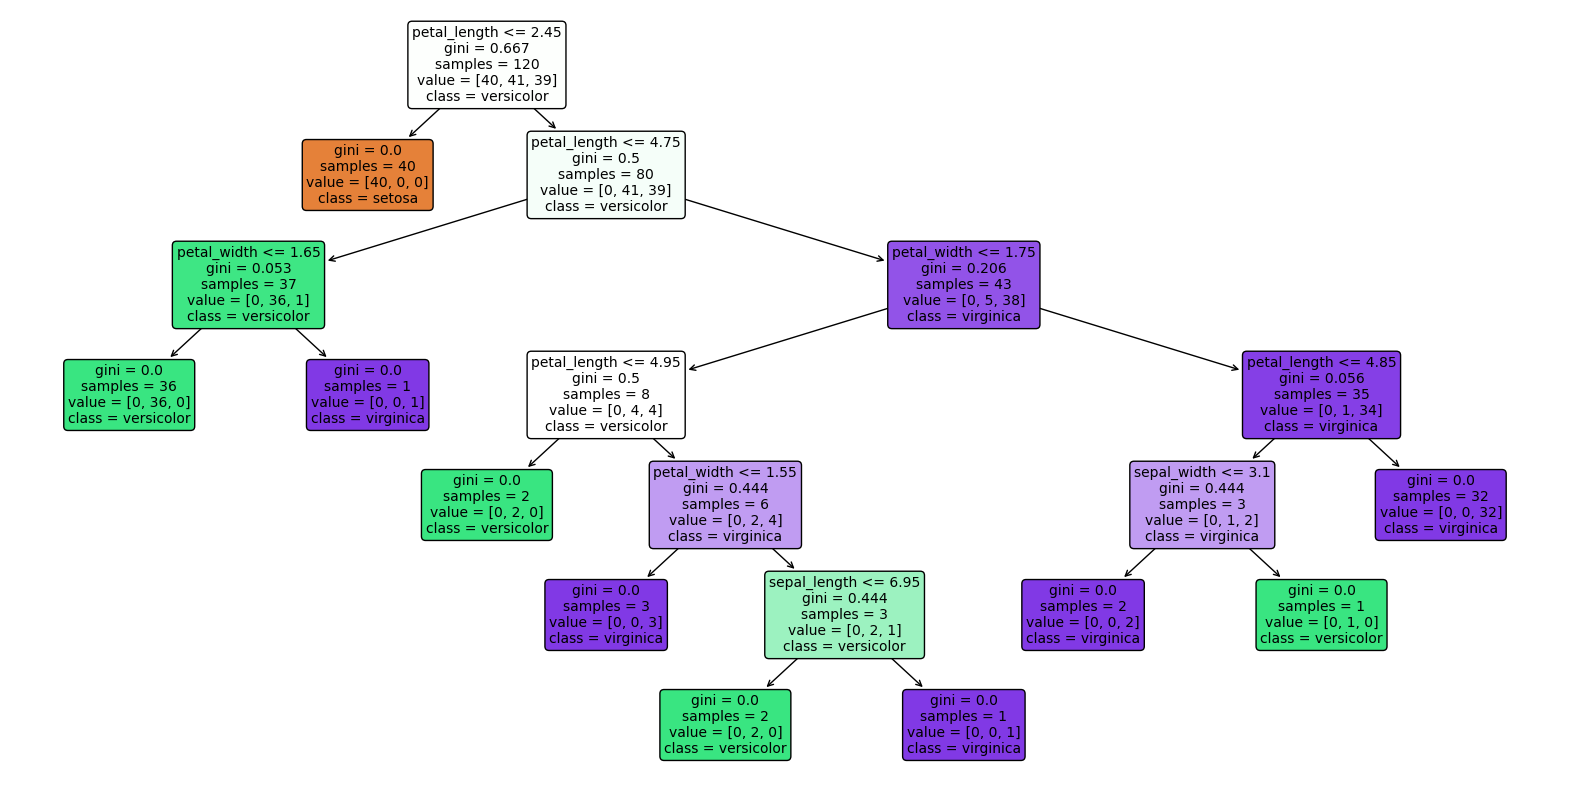

In [22]:
# Plotar a Árvore de Decisão
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=X.columns, 
               class_names=y.unique(),
               filled=True, 
               rounded=True, 
               fontsize=10)

plt.show()

### Parâmetros:
- criterion: Define a métrica usada para avaliar a qualidade de uma divisão. ("gini" ou "entropy")
- splitter: Estratégia para escolher a divisão em cada nó. ("best" ou "random")
- max_depth: Profundidade máxima da árvore. Limita o tamanho da árvore e previne o overfitting.
- min_samples_split: Número mínimo de amostras necessárias para dividir um nó.
- min_samples_leaf: Número mínimo de amostras que um nó folha deve ter.
- max_features: Número máximo de atributos considerados para dividir um nó.
- max_leaf_nodes: Número máximo de nós folha na árvore.
- min_impurity_decrease: Um nó será dividido se a divisão induzir um decréscimo de impureza igual ou maior a esse valor.
- class_weight: Pode ser usado em caso de classes desbalanceadas.
- random_state: Controla a aleatoriedade na seleção de divisões, garantindo resultados reproduzíveis.